## CT5170: Principles of ML - Assignment 2
### Course code: 1MAO3
#### Participants (name: id): (Daniel Verdejo: 22240224, Thomas Cronin: 22239435)

### Data Exploration and Clean-up
##### Tom's Work
A helper function was created to load the dataset into a pandas DataFrame; this function ‘read_data_return_dataframe’ takes a string containing the path to a txt file. It reads the dataset via pandas.read() and returns the DataFrame containing the data.

Exploring the data showed the ranges and statistical data, while being quite distinct from each other and all in a usable state, would require normalisation. The ‘fire’ column, however, did not look correct; it contained eight unique entries for what should have been two individual entries, ‘yes’ or ‘no’. It seemed like the data was being read with questionable spaces giving them, as far as panda DataFrames are concerned, unique entries. To replace the entries, a convert_label function was implemented to replace a specified binary value with a different binary value. This allowed the change from ‘yes/no’ to ‘1/0’ while also replacing duplicate entries.

The dataset is imbalanced, slightly skewed to the positive case ‘yes’. There are 97 ‘no’ and 107 ‘yes’.

To normalise the data, the helper function Normalize was implemented to normalise all the data to 0-1 ranges. It takes a DataFrame and a list of features, returning a DataFrame of the normalised value of each entry in each feature column.

##### Daniels work

Splitting data into training_data, testing_data, training_labels, testing_labels is done using some simple dataframe functionality. First by splitting the dataset into 2 fractions (train and test) typically around 80 - 90% train with the remainder being test. These are then further split down into their labels and features / attributes using  `df.iloc` with some simple list comprehension taking all rows and segregating by column Finally to normalise the labels another simple list comprehension is used to map values 1 to every 'yes' found, and 0 to every 'no' found in the labels. 

### Algorithms
#### Perceptron Algorithm
##### Tom's Work
<u>Design Decisions:</u>
* I choose not to include a bias modification for the perceptron as it would not be needed to hopefully get a high accuracy on this dataset, based on the data exploration.
* The perceptron initiates the weights if not specified between random values of (-0.5, 0.5) after researching the algorithm this was deemed a suitable weight range. It is also possible to pass predefined weights to the nueron.
* For the sigmoid activation function it was decided that a summed weights=0, which in sigmoid would return a 0.5 would still be a positive case and would activate the perceptron with a 1.

<u>Algorithm Design</u>
   Pseudo Code:

        ThresholdLogicUnit()
            Learning Rate = Input()
            Input Weights = Initialised Randomly or Input
            Activation Functions = Heaviside or Input
          
            fit()
                Training Set = Input()
                Labels = Input() or None
                Learning Iterations = Input or 200

                for each iteration:
                    predict value on inputs
                    compare predictions with results
                    if prediction is wrong update weights:
                        new weights = weighs -  value of learning rate multiplied by (prediction - label) multiplied by input
            predict()
                samples = Input
                for each sample predict a score
                return a list of the predictions

The Perceptron Algorithm:
    
The Threshold Logic Unit takes in n_dimentional data and there corresponding 1_dimentional array of labels. It requires a learning rate, which is used to tune the changing of the weights values. After getting the data and labels, the weights for the amount of features in a sample (the input shape) is initialised  randomly between values of -0.5,+0.5 (note: these can be set aswell). The Threshold Logic Unit then loops for the amount of iterations it should run and trains on each sample. During the training process it will predict a score using the specified activation function. If the score is not equal to the coresponding label, the weights are updated by subtracting the current weights with the learning rate * error * the input. Once the TLU has completed its training, we can then pass it an unseen sample and get a prediction.

#### Multi Layer Perceptron Algorithm

For the comparrison of our implementation of the MultiLayer Perceptron the decision was made to use MLPClassifier found in sklearn.neural_network package. It can be seen from the scores above that sklearns implementation is better at classifying the data over our implementation of the MultiLayer Perceptron(MLP). The reasoning behind this is likely due to some design decisions which we're made on the perceptron, which will be discussed shortly.

First lets review the design of the MLP neural network(NN) model.

The MLP is built up of `n` amount of layers. When we construct the object we initialise its layers and weights to empty lists. From there, every time the `add_layer` function is called, the weights are added for the given layer. A layer consists of 'm' number of neurons, our Threshold Logic Unit(TLU) perceptrons. The layer itself manages its neurons with respect to how its `fit, predict, update, and initialise` functions are called. The layer passes arguments down to each of its child neurons including the `learning_rate` and `activation`. The activation function defines what the neurons outputs will be, whether they are `0` and `1` as you would get from a sigmoid or heaviside function, or a value ranging from -.5 to greater than 0 that we get from the ReLU activation function.

Reverting to the MLP NN, some functions are defined on the class as: forward_propegation, back_propegation, train, and predict.

1. The `forward_propegation` function is the process of forwarding the output of the previous hidden layer into the layer which follows. The input -> first hidden layer is unique as it receives `X`, our dataset in its "raw" form (after normalisation, splitting and so on.). The first hidden layer in our example is initialised using the ReLU function for its child neurons. The output of the layer is propegated to the next layer in the network, which will pass its output to the layer which follows it until we come to the output layer, the end of the NN. The output layer returns a list of classifications that is the size of `n` number of samples (e.g. 50 samples are fed to the NN, 50 classifications are returned from the NN).
2. The `back_propegation` function is the process of feeding back the error and delta in our outputs relative the the labels for every layer in the network. The error is gathered by comparing the output `Z` of the `forward_propegation` function relative to the labels `Y`. The delta is then calculated by multiplying the error of the output by the derivative of sigmoid `Z`.  With this information the NN can update the weights for each layer based off the dot products of the individual error and delta for each layer. The update value from the dot product of the transposed `X`, `d` (delta per layer) is passed to the layer which feeds the update into its neurons (perceptrons). Typically the bias would also be calculated, but the decision was made to exclude the bias from the perceptron, additionally removing the need to add or process biases in the `forward_propegation` and `back_propegate` functions.
3. The `train` function simply calls the `forward_propegation` and `back_propegation` functions `n` times. It also has the ability to show metrics as the iterations go by. Finally it returns the outputs of the `forward_propegation` function.
4. The `predict` function similar to the `train` function calls `forward_propegation` but only once and returns its output.
 

### Test's and Result's
#### Perceptron
##### Tom's Work
<u>The Perceptron Comparisons:</u>
The Perceptron I chose to compare to as the refrence Perceptron is SK_learns Perceptron Class.

Testing the Sk_Learn Perceptron:
* When exploring the Perceptron against the training set, I was curious to see what the learning iterartions was as in the current version of sk_learn you cannot manually set it, however it is possible to see the number of learning iterations it completes after fitting, this can be done by accessing the Perceptron().n_iter_ variable. I ran it several time with different sets of data and it never went past 20 iterations. Inclusive of the Traing sets for wildfires.txt

The overall tests were run on 5 versions of the wildfires data with a split ratio of:

The Accuracy, Recall, Precison and f1_score was then calculated for each:

    | Train Percent | Test Percent|| Accuracy | Recall| Precison | f1_score |
    |---------------|-------------||----------|-------|----------|----------|
    |90%            |10%          ||0.3414    |0.3478 | 0.4      |0.372     |
    |80%            |20%          ||0.4634    |0.5416 |0.5416    | 0.5416   |
    |70%            |30%          ||0.5609    |0.625, |0.6896    |0.6896    |
    |60%            |40%          ||0.4878    |0.5769 |0.6       |0.5882    |
    |50%            |50%          ||0.4878    |0.5384 |0.3181    |.3999     |

The Singular Perceptron didn't do that well on the data set, as the test to train ratio increased it started to become better at genearlising, with the best train test split being 7:3. Overall however the single perceptron's accuracy was about as good as flippng a coin each time and as the dataset was not quite but almost balanced this would sugest the model is almost just guessing yes or no each time.

Testing the Threshold Logic Unit Perceptron:
* In an attempt to keep the testing of both models realtivly fair and even, I set the learning rate of the TLU to be that of the SK_Learn Perceptron and reduced the iterations to be no more than 20 iterations per training. 

The overall tests were run on 5 versions of the wildfires data with a split ratio of:

The Accuracy, Recall, Precison and f1_score was then calculated for each:

    | Train Percent | Test Percent|| Accuracy | Recall| Precison | f1_score |
    |---------------|-------------||----------|-------|----------|----------|
    |90%            |10%          ||0.658     |0.769  | 0.869    |0.816     |
    |80%            |20%          ||0.756     |0.730  |0.863     |0.791     |
    |70%            |30%          ||0.780     |0.791  |0.826     |0.808     |
    |60%            |40%          ||0.658     |0.714  |0.652     |0.681     |
    |50%            |50%          ||0.682     |0.68   |0.772     |0.723     |

The TLU performs decently on all variations of the train to test split, the scores never did better than 82% f1_score when constircted by the paramaters applied the the SK_Learn Perceptron. By increasing the learning iterations of the TLU the f1_score hit 95% and the accuracy was around the same. 

<u>Comparing Averaged Scores</u>

    | Test Percent      ||Avg: Accuracy |Avg: Recall|Avg: Precison |Avg: f1_score |
    |-------------------||--------------|-----------|--------------|--------------|
    |SK_Learn Perceptron||0.468         |0.525     |0.525         |0.518         |
    |TLU Perceptron     ||0.731         |0.737      |0.796         |0.764         |

In most cases the TLU perceptron outpreformed the SK_learn Perceptron by about 30%. If Sk_Learns Perceptron had the ability to modify the Learning Iterations I feel it would have most likely gotten a better score.

#### MLP Comparissons
##### Daniels work
<u>The MLP Comparisons:</u>
The chosen MLP comparisson was sklearn.neural_network: MLPClassifier

Overall the data suggests that the implementation done here performed worse on average than the sklearn implentation. This could be from a number of factors but potentially a big one being the omission of biases in the neural network. Some of the accuracies show very poor performances akin to guessing. I had noted that it performs better when fed large batches but the data below is from batches of 15 samples

The overall tests were run on 5 versions of the wildfires data with a split ratio of:

The Accuracy, Recall, Precison and f1_score was then calculated for each:

Our implentations

         Ratio  Accuracy, Precision, Recall, F1_score
    MLP: 0.3   0.4666,    0.3846,    1.0,    0.5555
    MLP: 0.27  0.2666,    0.125,     0.2,    0.153
    MLP: 0.35  0.4666,    0.54545,   0.6666, 0.6
    MLP: 0.1   0.4,       0.3333,    0.285,  0.3076
    MLP: 0.2   0.6666,    0.2,       0.5,    0.2857

Sklearn implementation

         Ratio  Accuracy, Precision, Recall, F1_score
    MLP: 0.3    0.73333,  0.6666,    0.4,    0.5
    MLP: 0.27   0.4,      0.333333,  0.8,    0.4705
    MLP: 0.35   0.8,      0.875,     0.7777, 0.8235
    MLP: 0.1    0.8,      0.7,       1.0,    0.8235
    MLP: 0.2    0.7333,   0.3333,    1.0,    0.5

Averages:

     Test Percent Avg: Accuracy Avg: RecallAvg: Precison Avg: f1_score 
    SK_Learn Perceptron, 0.468         ,0.525     ,0.525         ,0.518       
    TLU Perceptron     , 0.731         ,0.737     ,0.796         ,0.764     

Overall the NN's performance shows ~20 - 30% less accurate when compared to sklearns implementation. Additionally the recall, f1 score and precision show values of ~10 - 30 points lower on average when compared against sklearns implementation. Conclusion more time and work is needed to improve the MLP NN.

### Conclusion and observations
##### Tom and Danny's Conclusions and observaitons

***Observations and conclusions on the Perceptron***
While the TLU unit outperformed the SK_Learn Perceptron most of the time, it was incosistent. Sometimes it under performed significantly, whereas the SK_Learn while less accurate overall was consistent in its accuracy. I believe that had I implemented the Biases to the Perceptron its accuracy scores would be more consistent and inline with the SK_Learns Perceptron, however for this dataset as it outperformed on the Test set I am overall happy with its implementaion. Modifying the perceptron to accept activation functions rather than store preset activations functions would have also benefited its design for futrure implementaion and use within the MLP.
***Observations and conclusions on the MLP implementaion***
As briefly mentioned in the `back_propegation` function description, when comparing the local MLP implementation against the third party implementation, it is a possibility that while not including biases on a perceptron level has a negligable effect, it is likely that the omission on a network level could lead to poorer performance. _While this decision simplified the implementation on all levels (Perceptron, Layer, MLP), some more time and experimentation with these biases added in would show whether the omission of the biases was the right choice_. 

Overall the learning outcome from this assignment was beneficial and both Tom and I are happy with what we have learned, where we can improve in the future, but most importantly, we now have our own reference of how to build a neural net from scratch. 


# Implementation

In [1]:
import pandas as pd
import numpy as np
from seaborn import pairplot
from Utils import *
from Metrics import *

from ThresholdLogicUnit import ThresholdLogicUnit

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split


### Data Exploration

In [2]:
# Tom Cronin
loaded_data_frame = read_data_return_dataframe("../wildfires.txt") # Loads The wildfire Dataset
wildfires_df = loaded_data_frame.copy() # copys the data so we don't mess with the original dataset

print(wildfires_df.shape) # gets the dimensions of the dataframe
print("-" * 20)
print(wildfires_df.columns) # gets the features of the columns
print("-" * 20)
print(wildfires_df.dtypes) # returns the datatypes
print("-" * 20)
print(wildfires_df.describe(include='all'))

(204, 10)
--------------------
Index(['fire', 'year', 'temp', 'humidity', 'rainfall', 'drought_code',
       'buildup_index', 'day', 'month', 'wind_speed'],
      dtype='object')
--------------------
fire              object
year               int64
temp               int64
humidity           int64
rainfall         float64
drought_code     float64
buildup_index    float64
day                int64
month              int64
wind_speed         int64
dtype: object
--------------------
          fire         year        temp    humidity    rainfall  drought_code  \
count      204   204.000000  204.000000  204.000000  204.000000    204.000000   
unique       8          NaN         NaN         NaN         NaN           NaN   
top     yes             NaN         NaN         NaN         NaN           NaN   
freq       101          NaN         NaN         NaN         NaN           NaN   
mean       NaN  2011.975490   31.906863   62.279412    0.823529     48.537647   
std        NaN     3.320987  

#### Error in fire label?
It seems that the fire label is a mix of 'no' and 'yes' however there are different spaces causing the dataframe to think there are multiple entries, 8 instead of 2. Let's fix that

In [3]:
# Tom
ndarray = wildfires_df['fire'].copy() # gets the fire column
for index in range(len(ndarray)):   # loops through each entry
    if 'no' in ndarray[index].lower():
        ndarray[index] = "NO"   # sets label to No
    elif 'yes' in ndarray[index].lower():
        ndarray[index] = "YES" # sets label to yes
wildfires_df['fire'] = ndarray
labels_copy_df = wildfires_df['fire'].copy()
wildfires_df.describe(include='all')

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
count,204,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2011.975490,31.906863,62.279412,0.823529,48.537647,16.542304,15.691176,7.553922,16.446078
std,NaN,3.320987,3.814175,15.209388,2.117959,49.133366,14.634994,8.907722,1.196067,3.098074
min,NaN,2007.000000,22.000000,21.000000,0.000000,7.180000,1.320000,1.000000,6.000000,6.000000
25%,NaN,2009.000000,29.000000,52.750000,0.000000,10.627500,6.067500,8.000000,6.000000,14.750000
50%,NaN,2012.000000,32.000000,63.000000,0.000000,30.550000,11.535000,15.500000,8.000000,16.000000
75%,NaN,2015.000000,35.000000,74.250000,0.600000,62.367500,22.665000,24.000000,9.000000,18.000000


Fire is now a binary class

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'rainfall'}>,
        <AxesSubplot:title={'center':'drought_code'}>,
        <AxesSubplot:title={'center':'buildup_index'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'wind_speed'}>]], dtype=object)

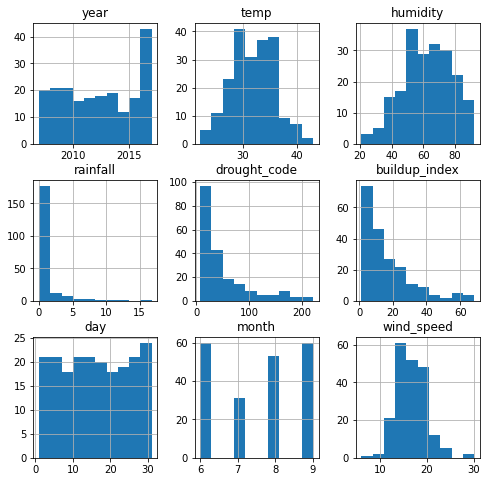

In [4]:
# Tom Cronin
# Lets Look at the data graphically
wildfires_df.hist(figsize=(8, 8))

### Perceptron Algorithm
For sake of clarity and shortness of this file, the perceptron was implemented as a ThresholdLogicUnit in a seperate file. Can be found in the zip

In [5]:
def score_preds(prediction, labels):
    scores = []
    scores.append(accuracy(prediction, labels))
    scores.append(precision(prediction, labels))
    scores.append(recall(prediction, labels))
    scores.append(f1_score(prediction, labels))
    return scores
    

In [6]:
wildfires = read_data_return_dataframe("../wildfires.txt")
wildfires_copy = wildfires.copy()
test_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]
my_perceptron = []
sk_learn_pereptron = []

for ratio in test_ratios:
    features = ['year', 'temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index', 'day', 'month', 'wind_speed']
    X_train, X_test, y_train, y_test = split_df_to_train_test_dfs(wildfires_copy, test_set_size=.2,
                                                        random_state=42)
      
    X_train = X_train[features].values  # returns a numpy NdArray of the features
    X_test = X_test[features].values  # returns a numpy NdArray of the features
    X_train = Normalize(X_train, features)
    X_test = Normalize(X_test, features)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train).flatten()
    y_test = np.asarray(y_test).flatten()
    y_train = np.asarray([1 if 'yes' in y else 0 for y in y_train])
    X_test = np.asarray(X_test)
    y_test = np.asarray([1 if 'yes' in y else 0 for y in y_test])


    perceptron = ThresholdLogicUnit(learning_rate=0.001, activation_function='sigmoid')
    perceptron.fit(X_train,y_train, learning_iterations=20)

    pred_train = perceptron.predict(np.asarray(X_train))
    predictions = perceptron.predict(np.asarray(X_test))
    
    my_perceptron.append(score_preds(predictions, y_test))
    
    y_train= y_train.astype('int')
    y_test= y_train.astype('int')
    sklp = Perceptron()

    y_train= y_train.astype('int')
    y_test= y_train.astype('int')
    sklp.fit(X_train, y_train)


    pred_train = sklp.predict(X_train)
    predictions = sklp.predict(X_test)
    sk_learn_pereptron.append(score_preds(predictions, y_test))

In [7]:
print("Compare my Perceptron with SKL Perceptron")

for index in  range(len(test_ratios)):
    print("Test Ratio: ", test_ratios[index])
    print("Accuracy, Precision, Recall, F1_score")
    print("TLU: ", my_perceptron[index])
    print("SKL: ", sk_learn_pereptron[index])
print() 
print('Average Scores tlu',  np.average(np.array(my_perceptron), axis=0))
print('Average Scores skl',  np.average(np.array(sk_learn_pereptron), axis=0))

Compare my Perceptron with SKL Perceptron
Test Ratio:  0.1
Accuracy, Precision, Recall, F1_score
TLU:  [0.5609756097560976, 0.5416666666666666, 0.65, 0.5909090909090908]
SKL:  [0.6097560975609756, 0.5555555555555556, 0.7894736842105263, 0.6521739130434783]
Test Ratio:  0.2
Accuracy, Precision, Recall, F1_score
TLU:  [0.6585365853658537, 0.7142857142857143, 0.5, 0.588235294117647]
SKL:  [0.3902439024390244, 0.4090909090909091, 0.42857142857142855, 0.4186046511627907]
Test Ratio:  0.3
Accuracy, Precision, Recall, F1_score
TLU:  [0.6341463414634146, 0.6551724137931034, 0.7916666666666666, 0.7169811320754716]
SKL:  [0.5365853658536586, 0.6842105263157895, 0.5, 0.5777777777777778]
Test Ratio:  0.4
Accuracy, Precision, Recall, F1_score
TLU:  [0.8292682926829268, 0.9047619047619048, 0.7916666666666666, 0.8444444444444444]
SKL:  [0.36585365853658536, 0.391304347826087, 0.42857142857142855, 0.4090909090909091]
Test Ratio:  0.5
Accuracy, Precision, Recall, F1_score
TLU:  [0.7073170731707317, 0.8

In [9]:
from MLP import MLP
from Utils import *
from sklearn.neural_network import MLPClassifier
from Metrics import *
import random

random.seed(2060)

data = read_data_return_dataframe("../wildfires.txt")
# Copy to be used for the rest of the assignment
wildfires_copy = data.copy()
# wildfires_copy = convert_label(wildfires,'fire',['no', 'yes'],[0, 1])


features = ['year', 'temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index', 'day', 'month', 'wind_speed']
mlp_vals = []
sk_vals = []
for ratio in [.3, .27, .35, .1, .20]:

    X_train, X_test, y_train, y_test = split_df_to_train_test_dfs(wildfires_copy, test_set_size=ratio,
                                                        random_state=42)
    X_train = X_train[features].values  # returns a numpy NdArray of the features
    X_test = X_test[features].values  # returns a numpy NdArray of the features
    X_train = Normalize(X_train, features)
    X_test = Normalize(X_test, features)

    X_train = np.asarray(X_train)[0:15]
    y_train = np.asarray(y_train).flatten()
    y_test = np.asarray(y_test).flatten()

    y_train = np.asarray([1 if 'yes' in y else 0 for y in y_train])[0:15]
    X_test = np.asarray(X_test)[0:15]
    y_test = np.asarray([1 if 'yes' in y else 0 for y in y_test])[0:15]

    m, n = X_train.shape
    mlp = MLP()
    mlp.add_layer(output_size = m, activation='relu', input_size=n) # Add a layer of 9 inputs and 32 outputs
    mlp.add_layer(output_size = 1, activation='sigmoid', input_size= m) # add output layer with 32 inputs and 1 output
    mlp.train(X=X_train, Y=y_train, iters=200, show_metrics=True)

    clf = MLPClassifier(random_state=1, max_iter=200).fit(X_train, y_train)


    p1 = mlp.predict(X_test)[0]
    p2 = clf.predict(X_test)
    
    mlp_vals.append(score_preds(p1, y_test))
    sk_vals.append(score_preds(p2, y_test))

print("Compare our MLP with SKL MLP")

for index in  range(len(test_ratios)):
    print("Test Ratio: ", [.3, .27, .35, .1, .20][index])
    print("Accuracy, Precision, Recall, F1_score")
    print("MLP: ", mlp_vals[index])
    print("SKL: ", sk_vals[index])
print() 
print('Average Scores MLP',  np.average(np.array(mlp_vals), axis=0))
print('Average Scores skl',  np.average(np.array(sk_vals), axis=0))


iteration: 0 / 200 ============= Acc: 0.4666666666666667
iteration: 25 / 200 ============= Acc: 0.4666666666666667
iteration: 50 / 200 ============= Acc: 0.4666666666666667
iteration: 75 / 200 ============= Acc: 0.4666666666666667
iteration: 100 / 200 ============= Acc: 0.4666666666666667
iteration: 125 / 200 ============= Acc: 0.4666666666666667
iteration: 150 / 200 ============= Acc: 0.4666666666666667
iteration: 175 / 200 ============= Acc: 0.4666666666666667
Prediction: [[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]]


C:\Users\danny\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


iteration: 0 / 200 ============= Acc: 0.8
iteration: 25 / 200 ============= Acc: 0.8
iteration: 50 / 200 ============= Acc: 0.8
iteration: 75 / 200 ============= Acc: 0.8
iteration: 100 / 200 ============= Acc: 0.8
iteration: 125 / 200 ============= Acc: 0.8
iteration: 150 / 200 ============= Acc: 0.8
iteration: 175 / 200 ============= Acc: 0.8
Prediction: [[0 1 0 1 1 0 1 1 0 0 1 0 1 1 1]]


C:\Users\danny\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


iteration: 0 / 200 ============= Acc: 0.5333333333333333
iteration: 25 / 200 ============= Acc: 0.5333333333333333
iteration: 50 / 200 ============= Acc: 0.5333333333333333
iteration: 75 / 200 ============= Acc: 0.5333333333333333
iteration: 100 / 200 ============= Acc: 0.5333333333333333
iteration: 125 / 200 ============= Acc: 0.5333333333333333
iteration: 150 / 200 ============= Acc: 0.5333333333333333
iteration: 175 / 200 ============= Acc: 0.5333333333333333
Prediction: [[1 0 1 0 0 1 1 1 1 1 1 0 1 1 1]]


C:\Users\danny\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


iteration: 0 / 200 ============= Acc: 0.3333333333333333
iteration: 25 / 200 ============= Acc: 0.3333333333333333
iteration: 50 / 200 ============= Acc: 0.3333333333333333
iteration: 75 / 200 ============= Acc: 0.3333333333333333
iteration: 100 / 200 ============= Acc: 0.3333333333333333
iteration: 125 / 200 ============= Acc: 0.3333333333333333
iteration: 150 / 200 ============= Acc: 0.3333333333333333
iteration: 175 / 200 ============= Acc: 0.3333333333333333
Prediction: [[0 0 0 0 0 0 0 1 1 0 1 0 1 1 1]]


C:\Users\danny\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


iteration: 0 / 200 ============= Acc: 0.6
iteration: 25 / 200 ============= Acc: 0.6
iteration: 50 / 200 ============= Acc: 0.6
iteration: 75 / 200 ============= Acc: 0.6
iteration: 100 / 200 ============= Acc: 0.6
iteration: 125 / 200 ============= Acc: 0.6
iteration: 150 / 200 ============= Acc: 0.6
iteration: 175 / 200 ============= Acc: 0.6
Prediction: [[1 0 1 0 1 1 0 0 1 0 1 0 1 0 0]]
Compare our MLP with SKL MLP
Test Ratio:  0.3
Accuracy, Precision, Recall, F1_score
MLP:  [0.4666666666666667, 0.38461538461538464, 1.0, 0.5555555555555556]
SKL:  [0.7333333333333333, 0.6666666666666666, 0.4, 0.5]
Test Ratio:  0.27
Accuracy, Precision, Recall, F1_score
MLP:  [0.26666666666666666, 0.125, 0.2, 0.15384615384615385]
SKL:  [0.4, 0.3333333333333333, 0.8, 0.47058823529411764]
Test Ratio:  0.35
Accuracy, Precision, Recall, F1_score
MLP:  [0.4666666666666667, 0.5454545454545454, 0.6666666666666666, 0.6]
SKL:  [0.8, 0.875, 0.7777777777777778, 0.823529411764706]
Test Ratio:  0.1
Accuracy, Preci

C:\Users\danny\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
